In [58]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from typing import Dict
import re
from utils.tsboard_aggregator import TensorBoardPrinter

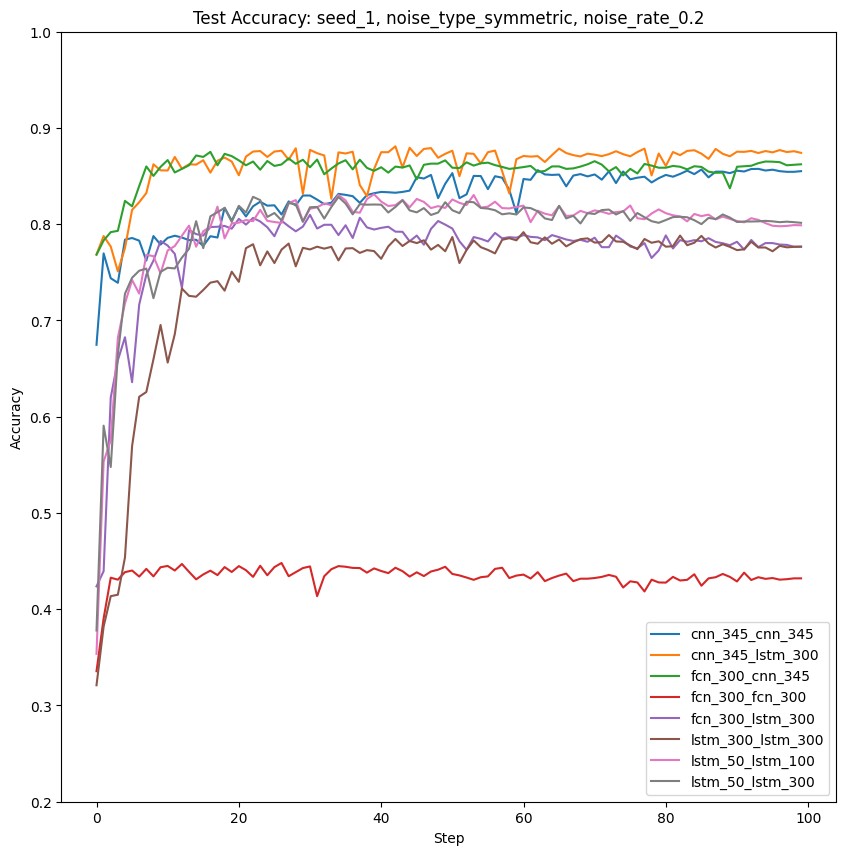

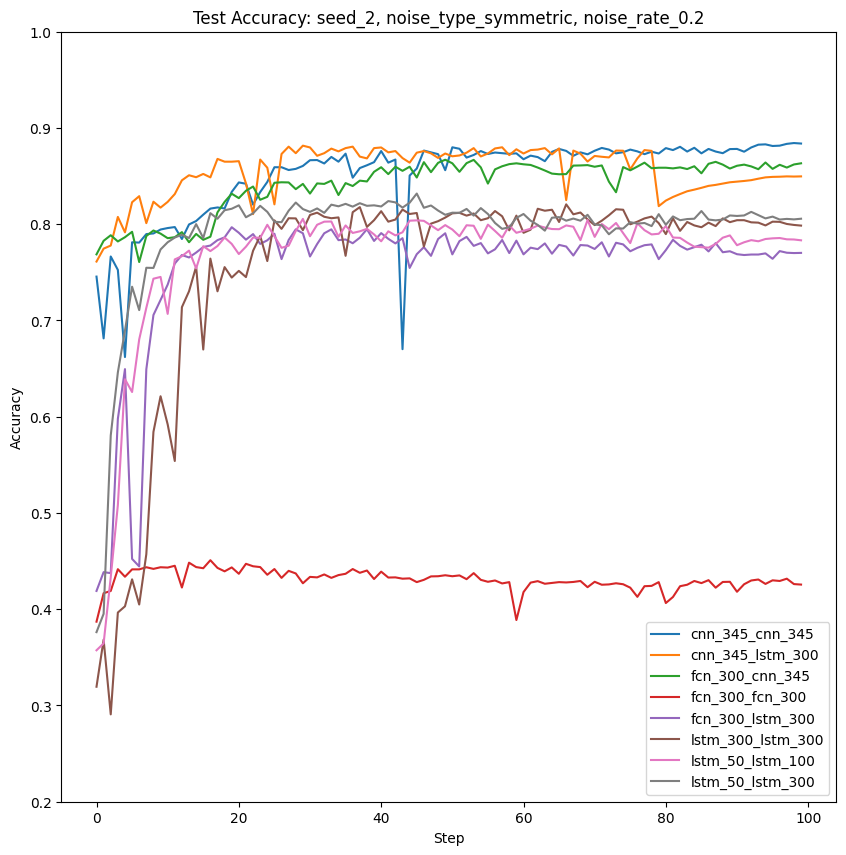

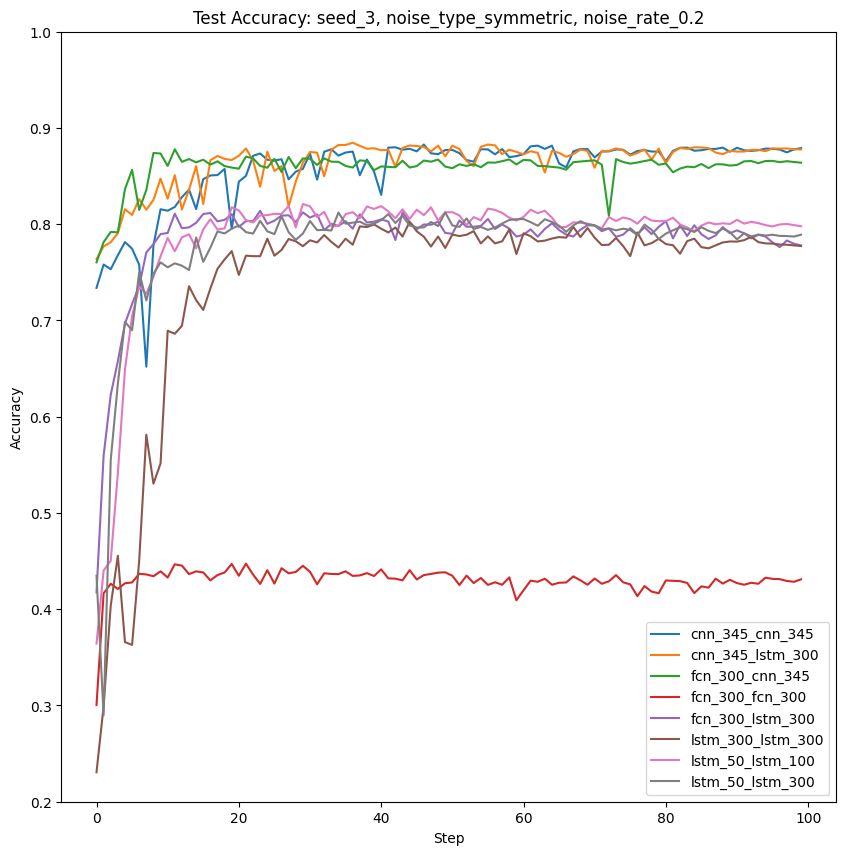

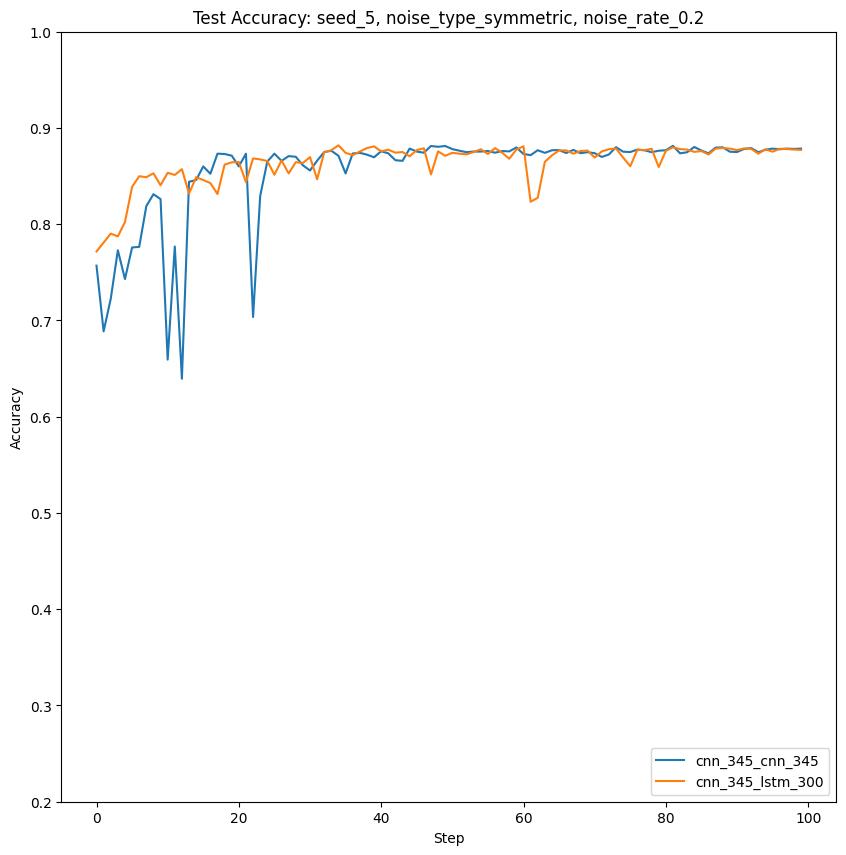

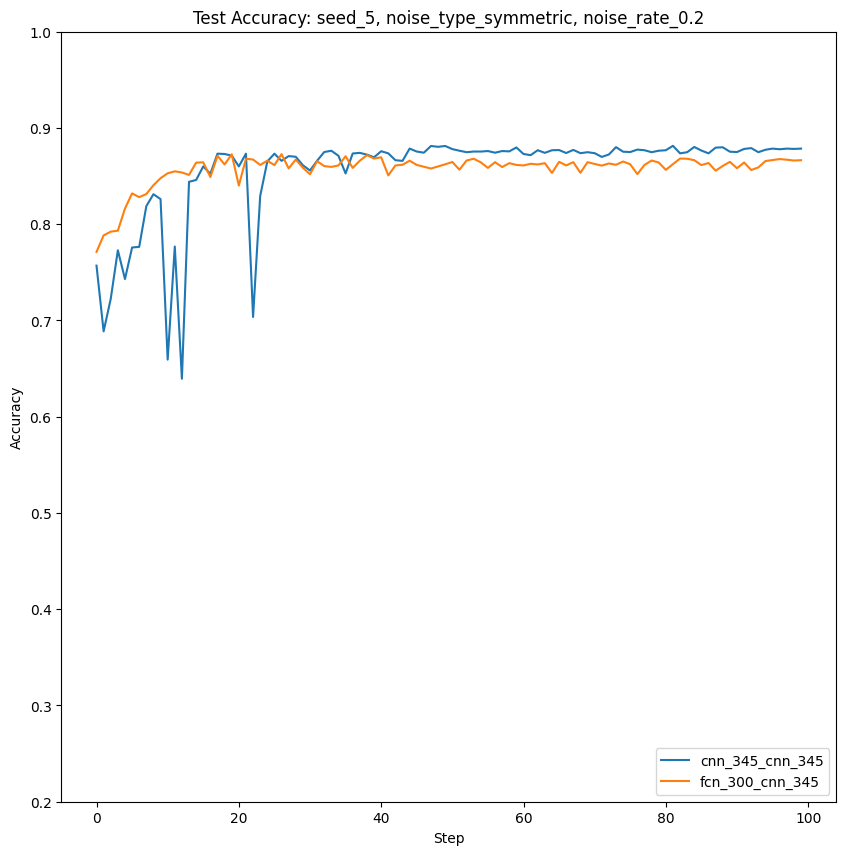

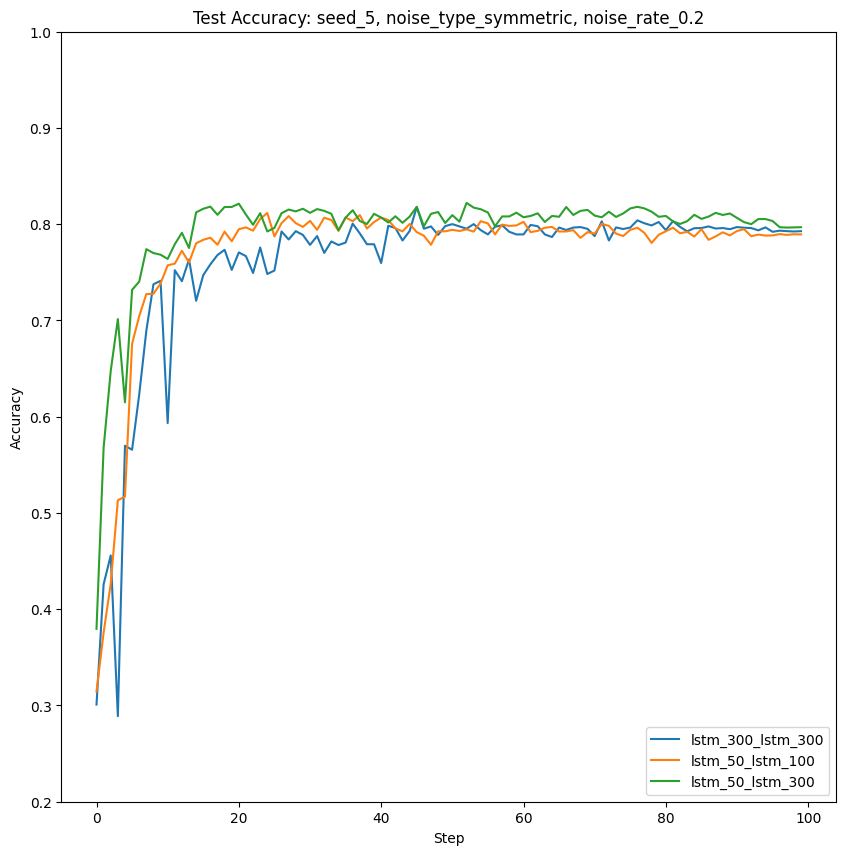

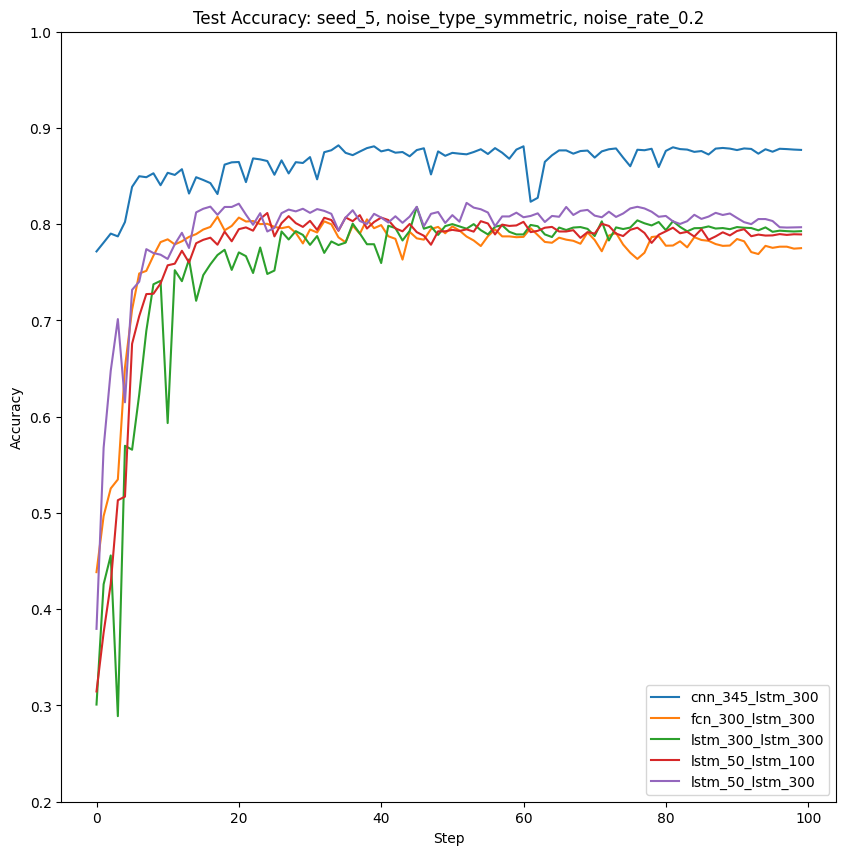

In [70]:
color = cm.rainbow(np.linspace(0, 1, 10))

def save_fig_acc(target: Dict[str, Dict[str, pd.DataFrame]],
                 filter: Dict = None,
                 output_path: str = None) -> None:
    if filter is None:
        filter = {'seed': '1', 'noise_type': 'symmetric', 'noise_rate': '0.2'}

    # 1_symmetric_0.2_cnn_345_cnn_345'
    # filter에 맞게 target dictionary 내에 key들만 따로 뽑아서 사용
    filtered_target_keys = []
    regex = '^'
    for f in ['seed', 'noise_type', 'noise_rate', 'model1', 'model_opt1', 'model2', 'model_opt2']:
        if (f in filter.keys()) and (filter[f] != ''):
            regex += filter[f] + '_'
        else:
            # 문자, 숫자, dot, 사용
            regex += '[0-9a-zA-Z]+[\.0-9a-zA-Z]*'+'_'
    regex = regex[:-1] + '$'
    pattern = re.compile(regex)

    for k in target.keys():
        # regex에 해당하면
        if pattern.match(k):
            filtered_target_keys.append(k)

    fig, ax = plt.subplots(figsize=(10, 10))
    for k in filtered_target_keys:
        seed, noise_type, noise_rate, model1, model_opt1, model2, model_opt2 = k.split('_')
        label = '_'.join([model1, model_opt1, model2, model_opt2])
        ex = target[k]
        loss_keys = [k for k in ex.keys() if 'loss' in k]

        # case Test acc
        ax.set(xlabel='Step',
               ylabel='Accuracy', ylim=(0.2, 1),
               title=f'Test Accuracy: seed_{seed}, noise_type_{noise_type}, noise_rate_{noise_rate}')
        df = ex['test_acc']
        ax.plot(df['step'], df['value'], label=label)
        ax.legend(loc='lower right')

        # plt.savefig('./output_acc.png', dpi=200, facecolor='#eeeeee')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()

p = '../logs/news/coteaching_plus'
tb_printer = TensorBoardPrinter(root_dir=p)
res = tb_printer.recursive_run()
save_fig_acc(res, output_path=p, filter={'seed':'1'})
save_fig_acc(res, output_path=p, filter={'seed':'2'})
save_fig_acc(res, output_path=p, filter={'seed':'3'})
save_fig_acc(res, output_path=p, filter={'seed':'5', 'model1': 'cnn'})
save_fig_acc(res, output_path=p, filter={'seed':'5', 'model2': 'cnn'})
save_fig_acc(res, output_path=p, filter={'seed':'5', 'model1': 'lstm'})
save_fig_acc(res, output_path=p, filter={'seed':'5', 'model2': 'lstm'})